In [2]:
import nbimporter
import functions as func
import networkx as nx
import konect2networkx as k2n
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import numpy as np
import scipy.stats as st

In [3]:
def generate_ust_plot(name, n, colormap = False, with_node_labels = False, with_edge_labels = True, edge_font_size = 10, with_zero_edges = True, edge_threshold = 0.0, fig_width = 12, fig_height = 10, pos = [], with_mst = False):
  print("Hálózat beolvasása\n")
  G = func.network_graph(name)
  
  if (name[len(name) - 4:] == ".mtx"):
    name = name[:len(name) - 4]

  try:
    my_file = Path("pickle/" + name + "_normalized_" + str(n) + ".ls")
    if my_file.is_file():
      normalized = pickle.load(open("pickle/" + name + "_normalized_" + str(n) + ".ls","rb"))
    else:
      print("\nÉlek tömbbé alakítása")
      matrix = func.ust_matrix(G, n)
      print("\nÉlsúlyok normalizálása")
      normalized = func.ust_normalized(matrix)
      pickle.dump(normalized,open("pickle/" + name + "_normalized_" + str(n) + ".ls","wb"))
    print("\nÉlek színezése ", n, " random generált feszítőfa segítségével:")
    curr_pos = func.draw_normalized(normalized, colormap, with_node_labels, with_edge_labels, edge_font_size, with_zero_edges, edge_threshold, fig_width, fig_height, pos, with_mst)
    return curr_pos
  except:
    print("Nem sikerült az ust-k megjelenítése.")

In [4]:
def generate_edge_betw_plot(name, split="", colormap = False, with_node_labels = False, with_edge_labels = True, edge_font_size = 10, with_zero_edges = True, edge_threshold = 0.0,fig_width = 12, fig_height = 10, pos = [],  with_mst = False):
  print("Hálózat beolvasása:")
  G = func.network_graph(name, split)
  print("\nBetweenness centrality számolása")
  res = nx.edge_betweenness_centrality(G)

  try:
    print("\nÉlek színezése edge betweenness segítségével:")
    curr_pos = func.draw_normalized(res, colormap, with_node_labels, with_edge_labels, edge_font_size, with_zero_edges, edge_threshold, fig_width, fig_height, pos, with_mst)
    return curr_pos
  except:
    print("Nem sikerült az edge betweenness megjelenítése.")

In [49]:
def corr(name, n, split="", pear=True, spear=True, remove_node_with_one_edge=False):
  G = func.network_graph(name, split)
  G.remove_edges_from(nx.selfloop_edges(G))
  
  if (name[len(name) - 4:] == ".mtx"):
    name = name[:len(name) - 4]
  
  if (name[len(name) - 6:] == ".edges"):
    name = name[:len(name) - 6]
  
  normalized = pickle.load(open("pickle/" + name + "_normalized_" + str(n) + ".ls","rb"))

  if (remove_node_with_one_edge):
    to_be_removed = [x for x in G.nodes() if G.degree(x) <= 1]
    for item in to_be_removed:
      index = [i for i, v in enumerate(normalized[0]) if v[0] == item or v[1] == item]
      del normalized[0][index[0]]
      del normalized[1][index[0]]
    for x in to_be_removed:
      G.remove_node(x)
  
  ust_arr = np.array(normalized[1], dtype='float')
  res = nx.edge_betweenness_centrality(G)
  edgeb_arr = np.fromiter(res.values(), dtype=float)

  if (pear):
    statistic, p_value = st.pearsonr(ust_arr, edgeb_arr)
    print(st.pearsonr(ust_arr, edgeb_arr))
    #plt.plot(np.sort(ust_arr), np.sort(edgeb_arr), color='red', zorder=0)
    plt.scatter(ust_arr, edgeb_arr, zorder=1)
    plt.title("Pearson-féle korrelációs együttható: {:.4f}".format(statistic))

    z = np.polyfit(ust_arr, edgeb_arr, 1)
    p = np.poly1d(z)
    plt.plot(ust_arr,p(ust_arr),"r--")

    plt.show()
    
  if (spear):
    #print(st.spearmanr(ust_arr, edgeb_arr))
    rho, p_value = st.spearmanr(ust_arr, edgeb_arr)
    print(st.spearmanr(ust_arr, edgeb_arr))
    #plt.plot(np.sort(ust_arr), np.sort(edgeb_arr), color='red', zorder=0)

    ust_arr_ranked = st.rankdata(ust_arr)
    edgeb_arr_ranked = st.rankdata(edgeb_arr)

    plt.scatter(ust_arr_ranked, edgeb_arr_ranked, zorder=1)
    plt.title("Spearman-féle korrelációs együttható: {:.4f}".format(rho))
    #plt.title("rho: " + str(rho) + ", p: "+ str(p_value))
    plt.xlabel("Véletlen uniform feszítőfa (" + str(n) + ")")
    plt.ylabel("Él köztiségi centralitás")

    z = np.polyfit(ust_arr_ranked, edgeb_arr_ranked, 1)
    p = np.poly1d(z)
    plt.plot(ust_arr_ranked,p(ust_arr_ranked),"r--")

    plt.show()

In [105]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(2,5)
G.add_edge(2,6)
G.add_edge(5,6)
G.add_edge(3,7)
G.add_edge(3,8)
G.add_edge(7,8)
G.add_edge(4,10)
G.add_edge(4,9)
G.add_edge(9,10)

In [60]:
normalized = pickle.load(open("pickle/pelda_10_normalized.ls","rb"))
ust_arr = np.array(normalized[1], dtype='float')

In [61]:
res = nx.edge_betweenness_centrality(G)
edgeb_arr = np.fromiter(res.values(), dtype=float)

In [62]:
ust_arr_ranked = st.rankdata(ust_arr)
edgeb_arr_ranked = st.rankdata(edgeb_arr)

PearsonRResult(statistic=0.8918880369374724, pvalue=9.676418292951837e-05)


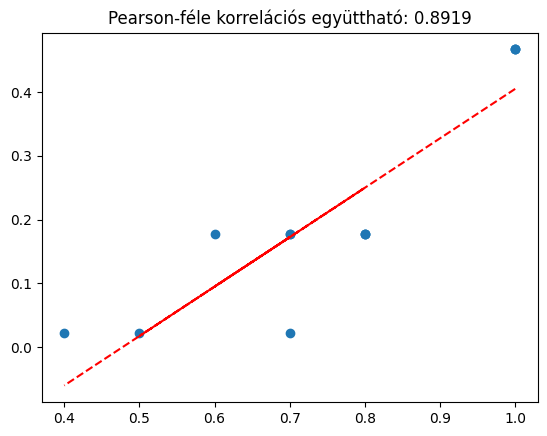

In [65]:
statistic, p_value = st.pearsonr(ust_arr, edgeb_arr)
print(st.pearsonr(ust_arr, edgeb_arr))
plt.scatter(ust_arr, edgeb_arr, zorder=1)
plt.title("Pearson-féle korrelációs együttható: {:.4f}".format(statistic))
z = np.polyfit(ust_arr, edgeb_arr, 1)
p = np.poly1d(z)
plt.plot(ust_arr,p(ust_arr),"r--")
plt.show()

SignificanceResult(statistic=0.8719751330189449, pvalue=0.00021763547286464426)


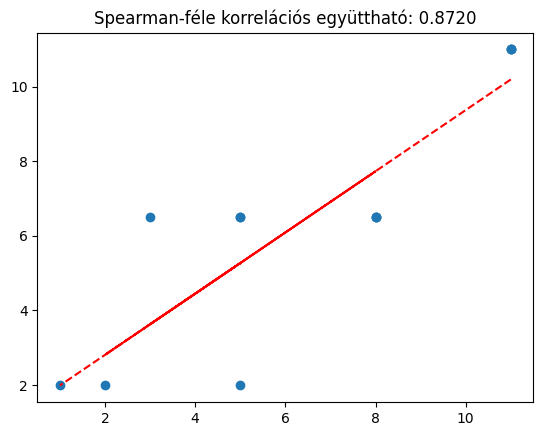

In [64]:
rho, p_value = st.spearmanr(ust_arr, edgeb_arr)
print(st.spearmanr(ust_arr, edgeb_arr))
plt.scatter(ust_arr_ranked, edgeb_arr_ranked, zorder=1)
plt.title("Spearman-féle korrelációs együttható: {:.4f}".format(rho))
z = np.polyfit(ust_arr_ranked, edgeb_arr_ranked, 1)
p = np.poly1d(z)
plt.plot(ust_arr_ranked,p(ust_arr_ranked),"r--")
plt.show()

<hr>

# Ábrák

### Zachary karate club

- **social network**
- csúcsok száma: **34**
- élek száma: **78**
- forrás: http://konect.cc/networks/ucidata-zachary/

Hálózat beolvasása

[KONECT2NetworkX] Attemping to download network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!

Élek tömbbé alakítása

Élsúlyok normalizálása

Élek színezése  1000  random generált feszítőfa segítségével:


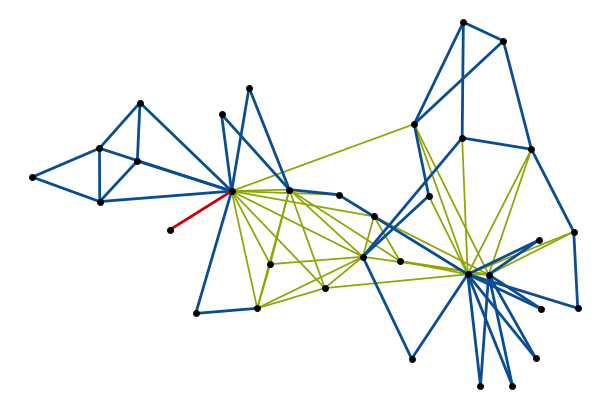

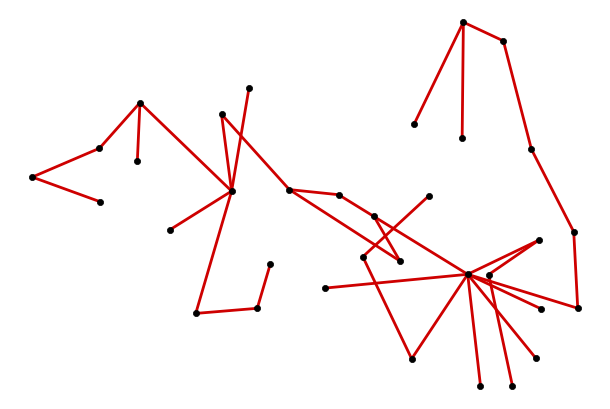

In [3]:
pos1 = generate_ust_plot('ucidata-zachary', 1000, with_edge_labels= False, fig_width=12, fig_height=8, with_mst=True)

Hálózat beolvasása

[KONECT2NetworkX] Attemping to download network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!

Élek színezése  1000  random generált feszítőfa segítségével:


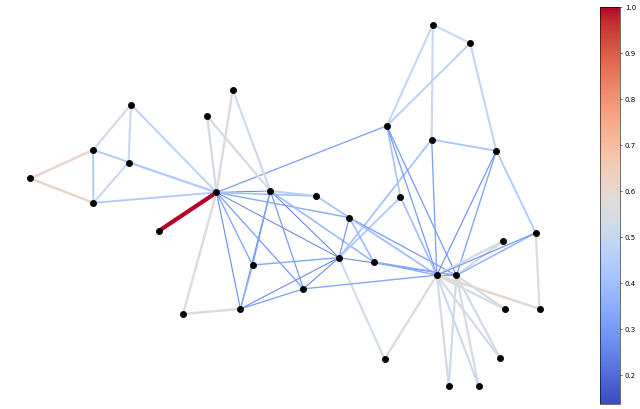

In [4]:
pos1 = generate_ust_plot('ucidata-zachary', 1000, colormap=True, with_edge_labels= False, fig_width=12, fig_height=8, pos=pos1)

#### Edge betweenness : Zachary karate club

Hálózat beolvasása:
[KONECT2NetworkX] Attemping to download network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!

Betweenness centrality számolása

Élek színezése edge betweenness segítségével:


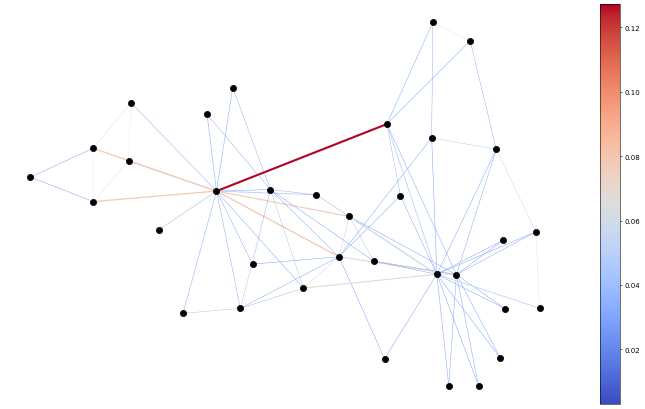

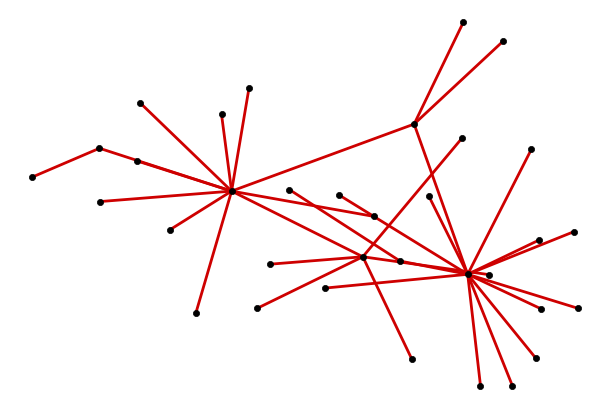

In [7]:
pos1 = generate_edge_betw_plot('ucidata-zachary', colormap=True, with_edge_labels= False, fig_width=12, fig_height=8, pos=pos1, with_mst=True)

[KONECT2NetworkX] Attemping to download network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!
PearsonRResult(statistic=-0.00538266258713304, pvalue=0.962695580356371)


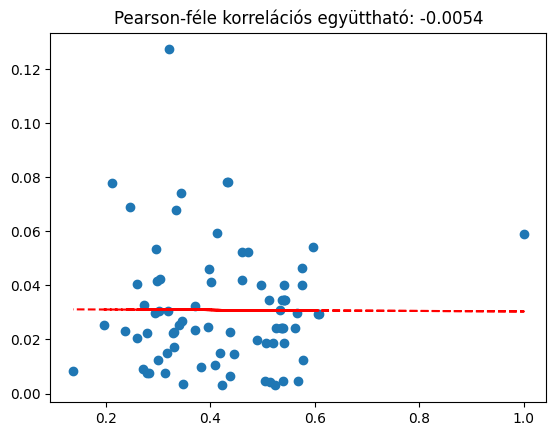

SignificanceResult(statistic=0.02664533215612589, pvalue=0.8168743830412207)


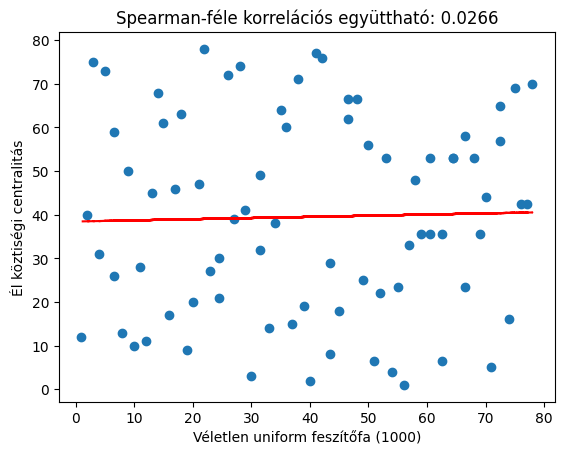

In [50]:
corr('ucidata-zachary', 1000)

[KONECT2NetworkX] Attemping to download network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to ucidata-zachary.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!
PearsonRResult(statistic=-0.07391686992508231, pvalue=0.5228985728123855)


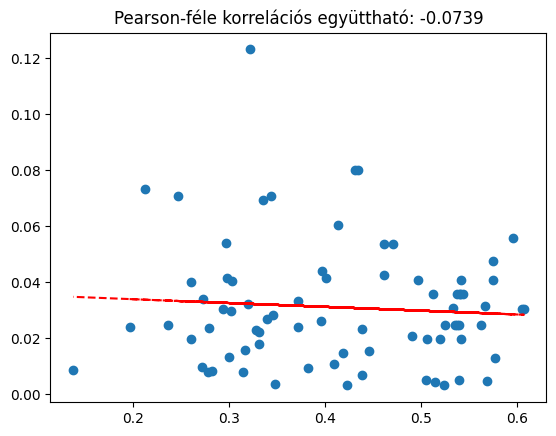

SignificanceResult(statistic=0.022122439594803957, pvalue=0.8485476837073891)


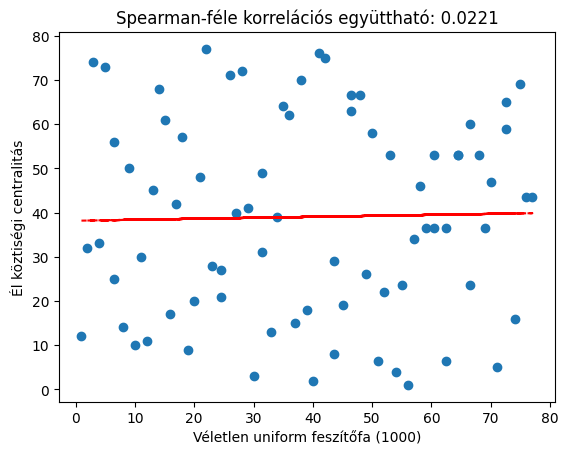

In [51]:
corr('ucidata-zachary', 1000, remove_node_with_one_edge=True)

### Contiguous USA

- **infrastructure network**
- csúcsok száma: **49**
- élek száma: **107**
- forrás: http://konect.cc/networks/contiguous-usa.edges/

In [74]:
G = func.network_graph('contiguous-usa.edges', " ")

In [75]:
matrix = func.ust_matrix(G, 1000)
#pickle.dump(matrix,open("pickle/contiguous-usa_ust_1000.ls","wb"))
#matrix = pickle.load(open("pickle/contiguous-usa_ust_1000.ls","rb"))

In [77]:
normalized = func.ust_normalized(matrix)

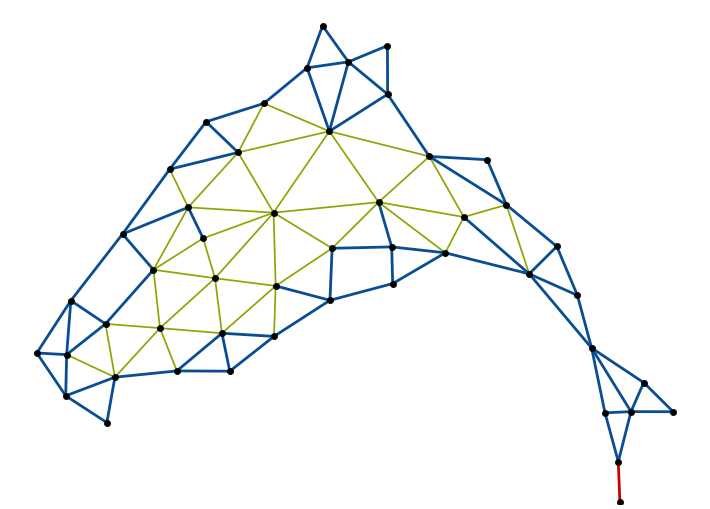

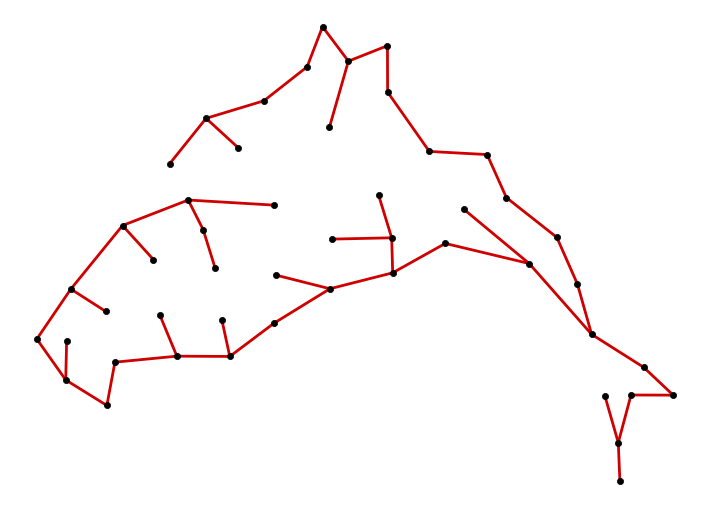

In [82]:
pos4 = func.draw_normalized(normalized, with_edge_labels= False, fig_width=14, fig_height=10, with_mst=True)

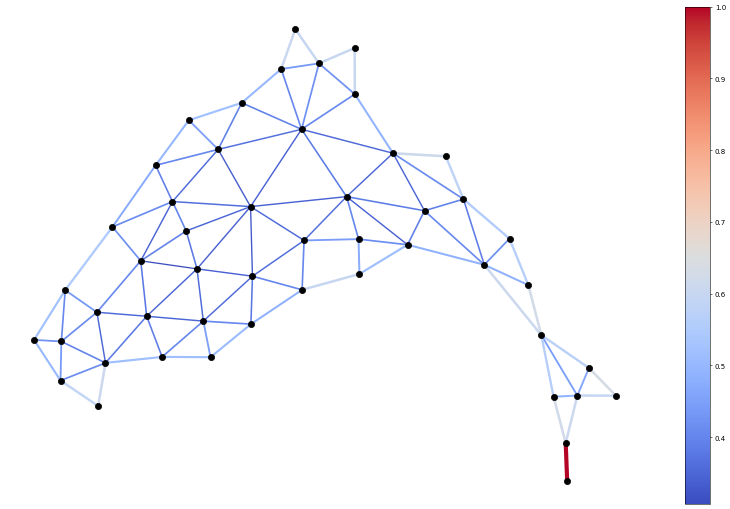

In [83]:
pos4 = func.draw_normalized(normalized, colormap=True, with_edge_labels= False, fig_width=14, fig_height=10, pos=pos4)

#### Edge betweenness : Contiguous USA

Hálózat beolvasása:

Betweenness centrality számolása

Élek színezése edge betweenness segítségével:


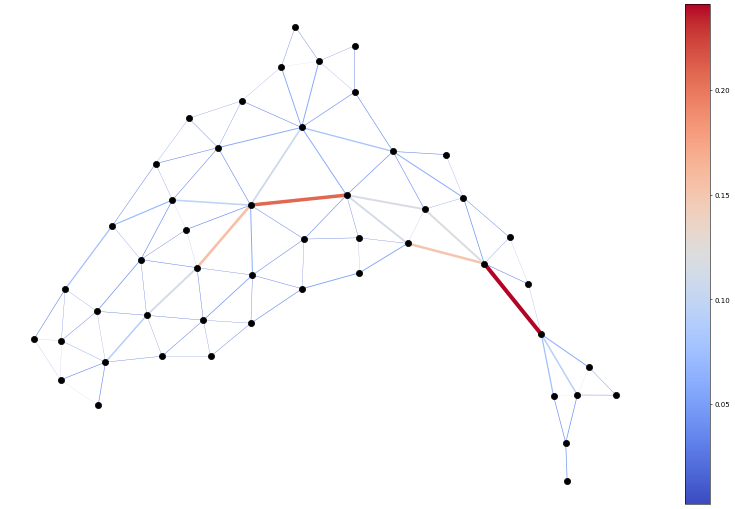

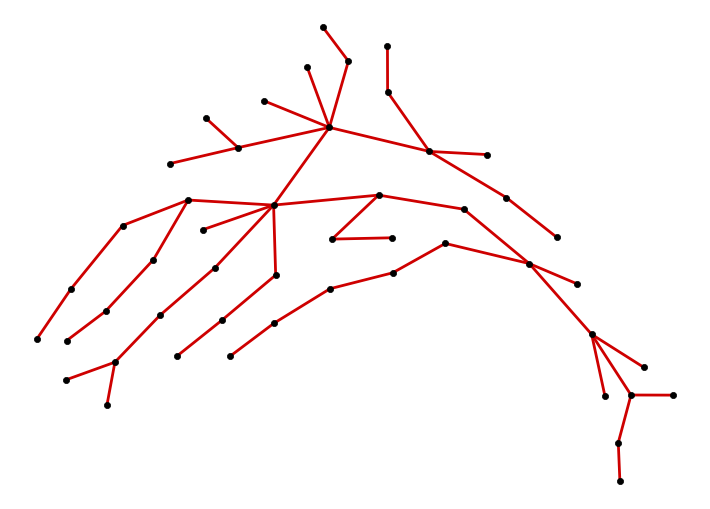

In [84]:
pos4 = generate_edge_betw_plot('contiguous-usa.edges', " ", colormap=True, with_edge_labels= False, fig_width=14, fig_height=10, pos=pos4, with_mst=True)

PearsonRResult(statistic=-0.06106659240962242, pvalue=0.5320748165137341)


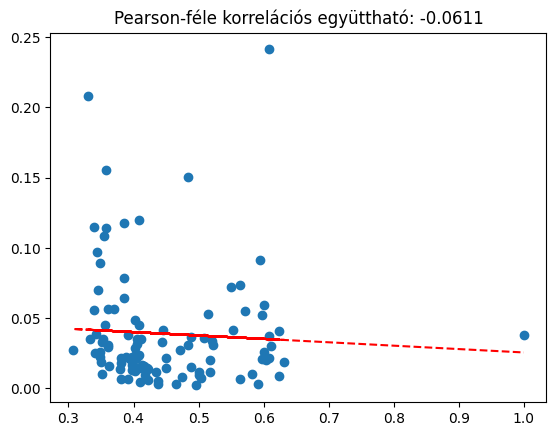

SignificanceResult(statistic=-0.18953169451768537, pvalue=0.05055185600136779)


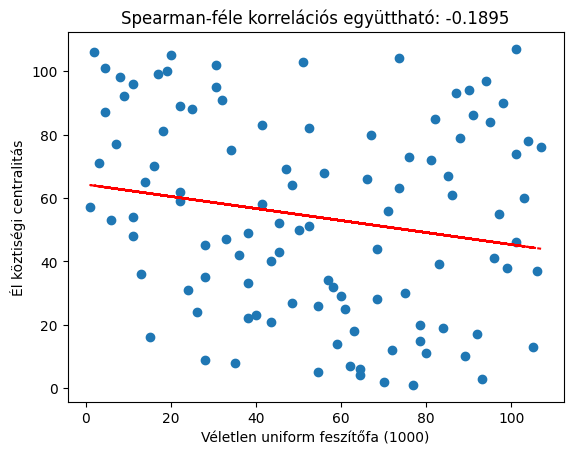

In [52]:
corr('contiguous-usa.edges', 1000, split=" ")

PearsonRResult(statistic=-0.10816035827462171, pvalue=0.2697594524349622)


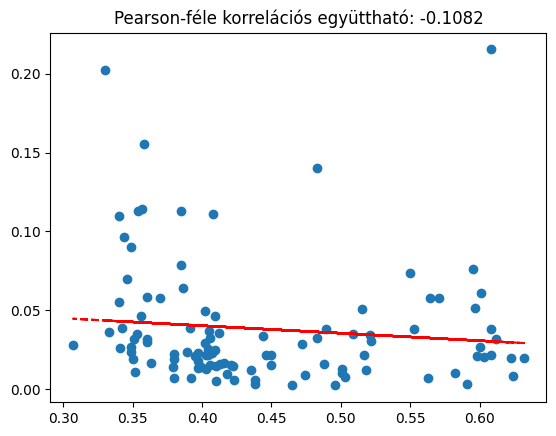

SignificanceResult(statistic=-0.23821088703726528, pvalue=0.013934072236012632)


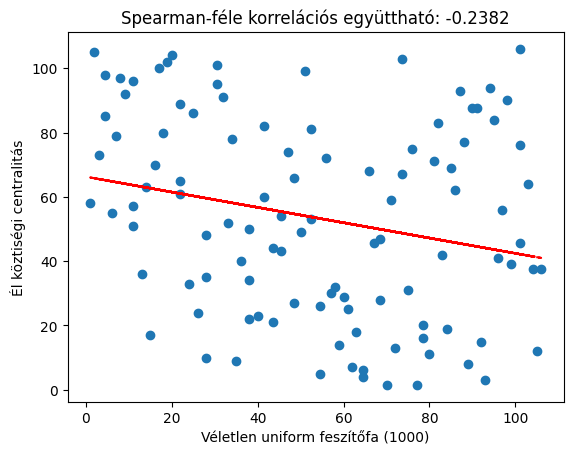

In [53]:
corr('contiguous-usa.edges', 1000, split=" ", remove_node_with_one_edge=True)

### USAIR97

- **infrastructure network**
- csúcsok száma: **332**
- élek száma: **2126**
- forrás: https://networkrepository.com/inf-USAir97.php

In [66]:
G = func.network_graph('inf-USAir97.mtx')

In [67]:
matrix = func.ust_matrix(G, 50)

In [68]:
pickle.dump(matrix,open("pickle/inf-USAir97_ust_50_2.ls","wb"))

In [69]:
matrix2 = pickle.load(open("pickle/inf-USAir97_ust_50.ls","rb"))

In [70]:
res = [[0 for i in range(0, G.number_of_edges())] for j in range(101)]

for i in range(G.number_of_edges()):
  res[0][i] = matrix[0][i]

In [83]:
for j in range (51, 101):
  for i in range(G.number_of_edges()):
    res[j][i] = matrix2[j-50][i]

In [84]:
normalized = func.ust_normalized(res)

In [68]:
normalized = pickle.load(open("pickle/inf-USAir97_normalized_20.ls","rb"))

In [6]:
normalized = func.ust_normalized(matrix)

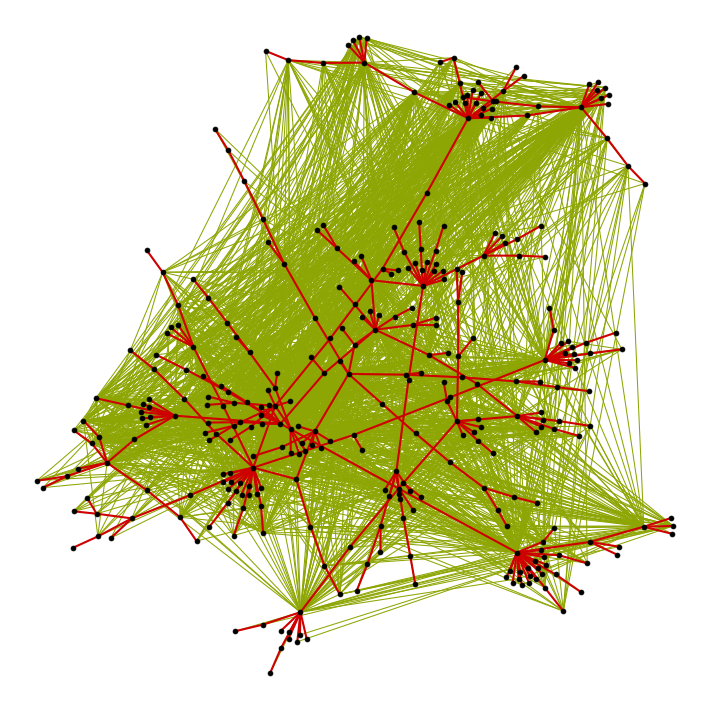

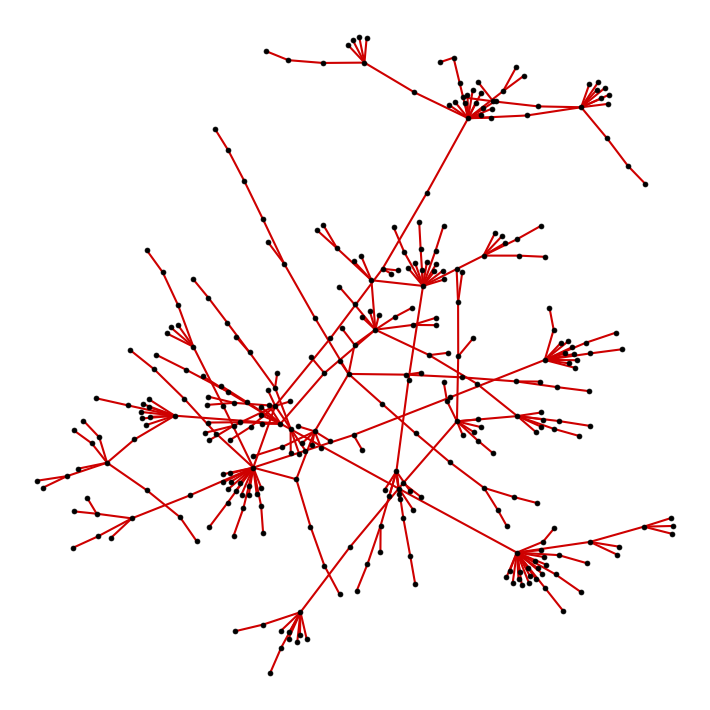

In [85]:
pos2 = func.draw_normalized(res, with_edge_labels= False, fig_width=14, fig_height=14, with_mst=True)

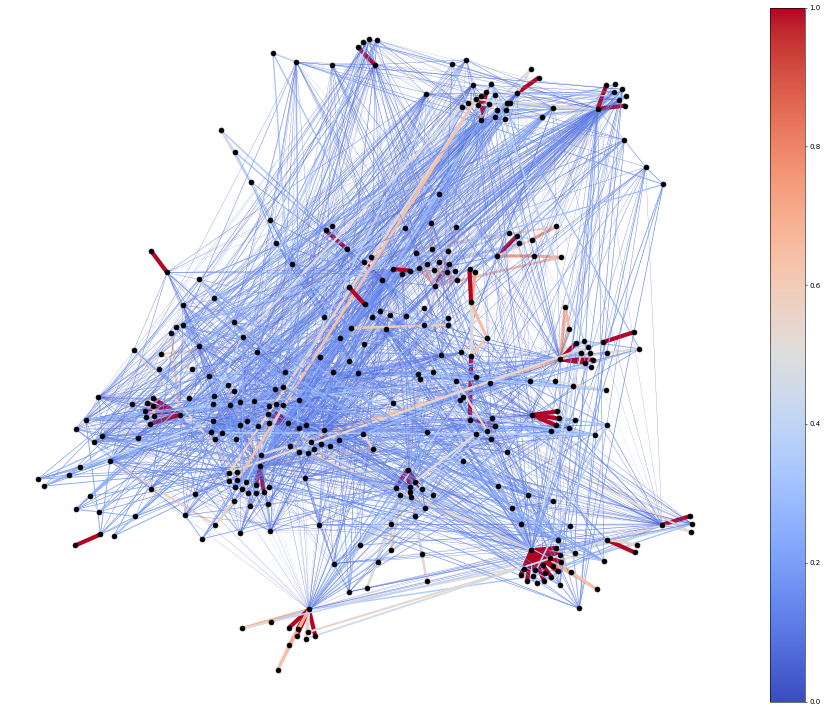

In [108]:
pos2 = func.draw_normalized(normalized, colormap=True, with_edge_labels= False, fig_width=16, fig_height=14, pos=pos2)

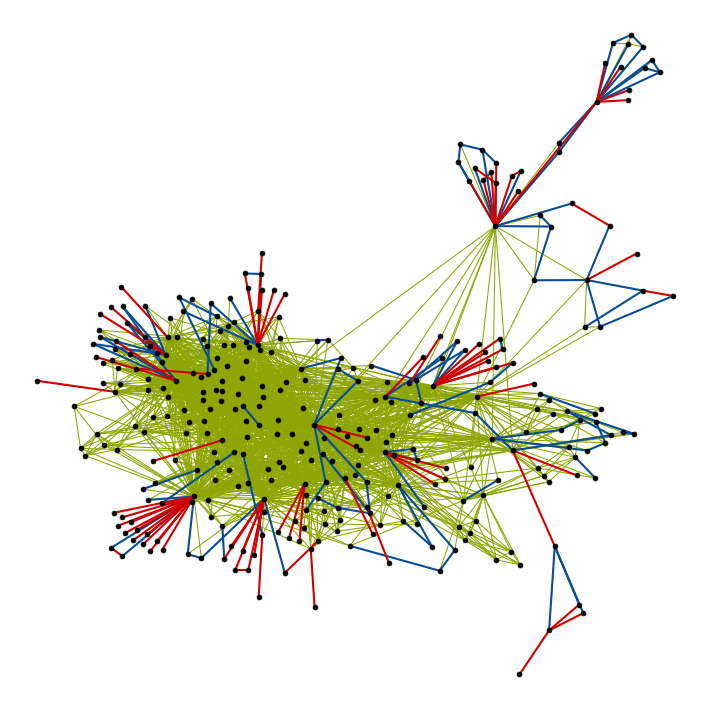

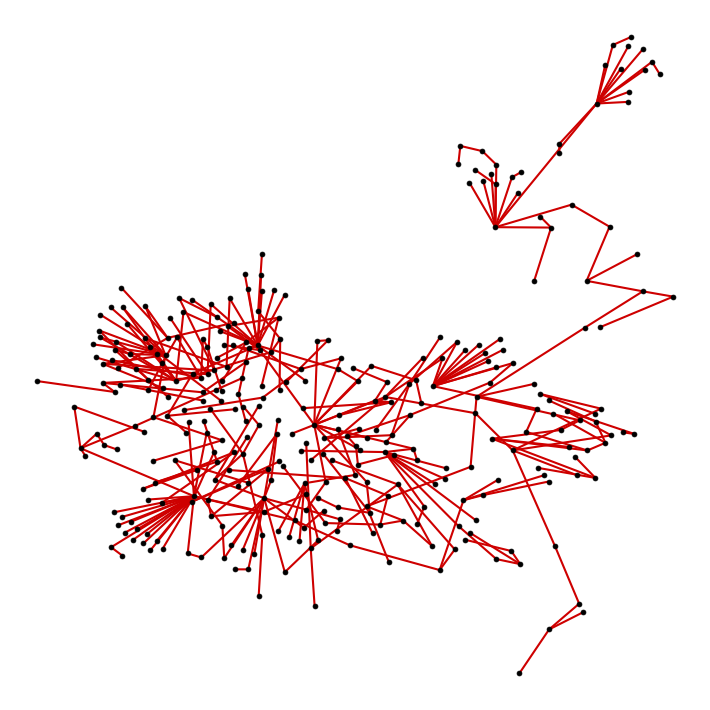

In [8]:
pos2 = func.draw_normalized(normalized, with_edge_labels= False, fig_width=14, fig_height=14, with_mst=True)

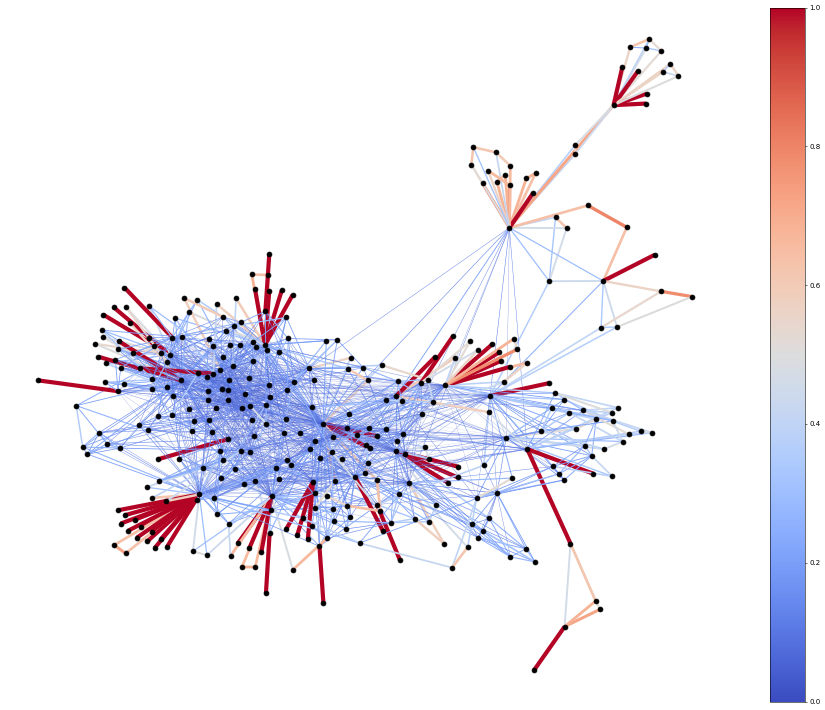

In [9]:
pos2 = func.draw_normalized(normalized, colormap=True, with_edge_labels= False, fig_width=16, fig_height=14, pos=pos2)

#### Edge betweenness : USAIR97

Hálózat beolvasása:

Betweenness centrality számolása

Élek színezése edge betweenness segítségével:


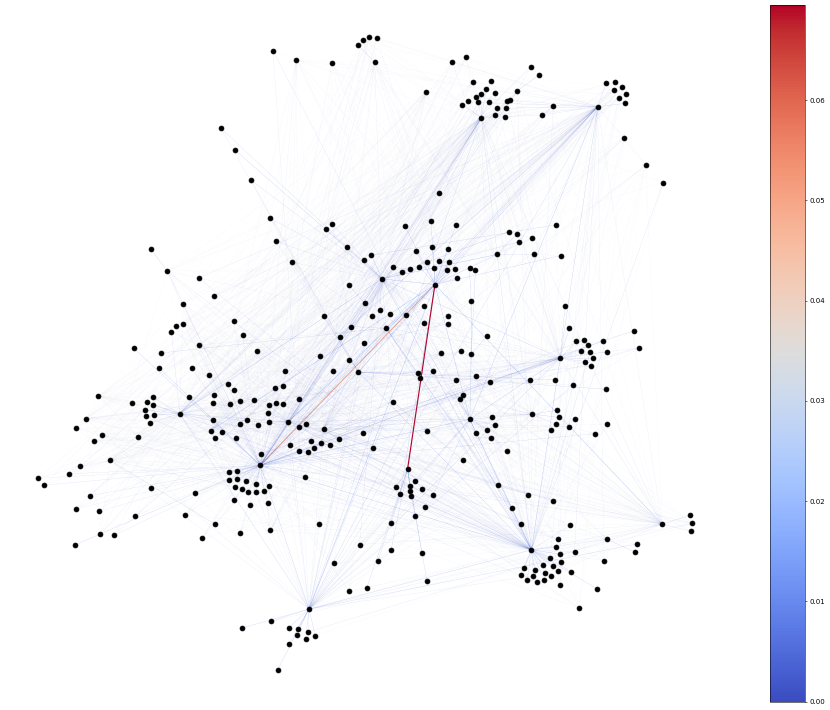

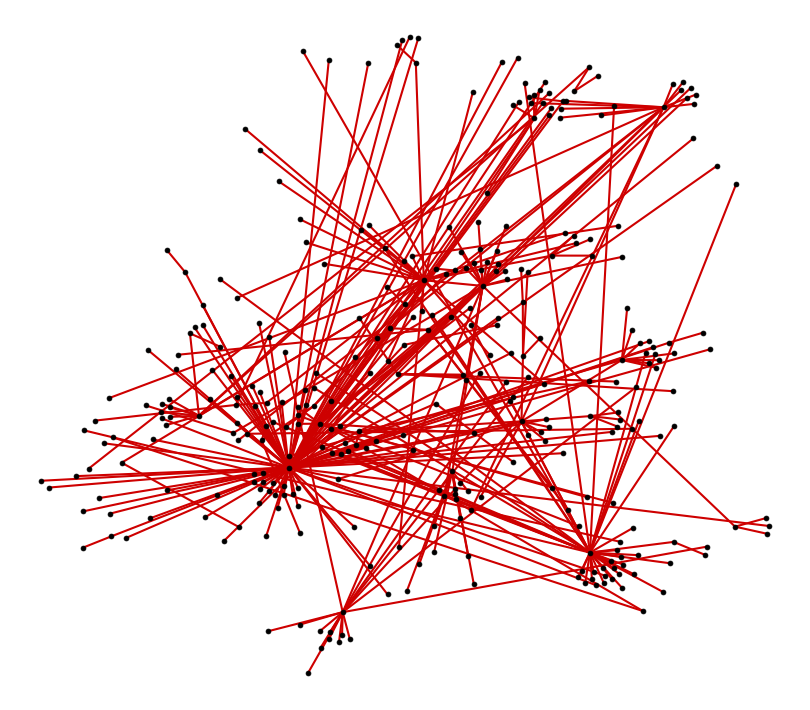

In [109]:
pos2 = generate_edge_betw_plot('inf-USAir97.mtx', colormap=True, with_edge_labels= False, fig_width=16, fig_height=14, pos=pos2, with_mst=True)

Hálózat beolvasása:

Betweenness centrality számolása

Élek színezése edge betweenness segítségével:


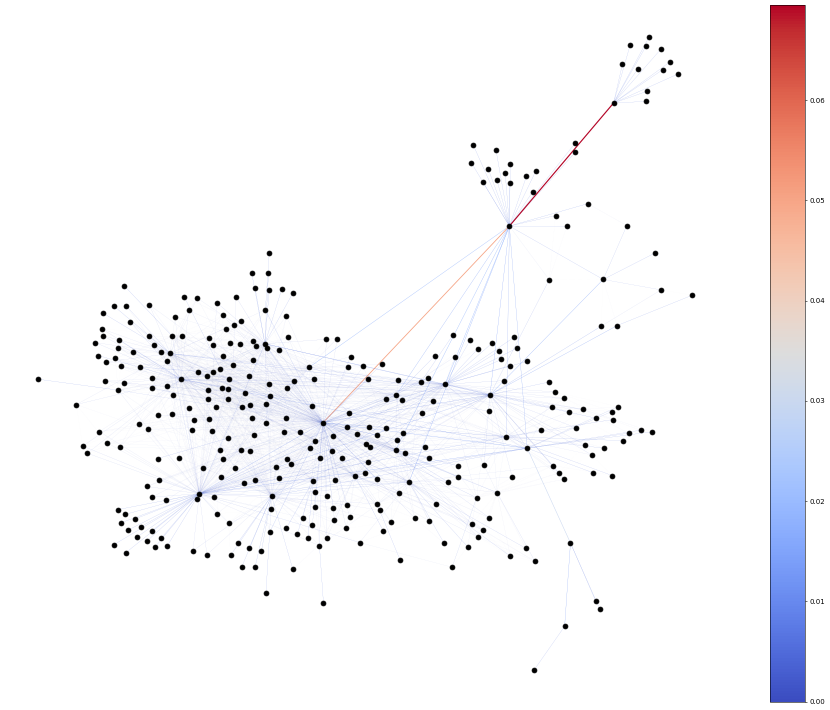

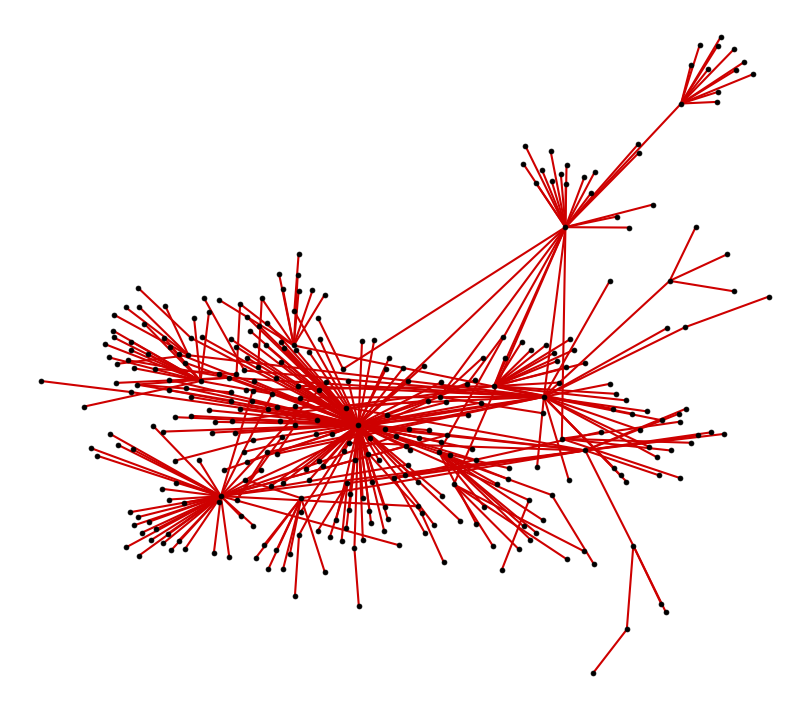

In [12]:
pos2 = generate_edge_betw_plot('inf-USAir97.mtx', colormap=True, with_edge_labels= False, fig_width=16, fig_height=14, pos=pos2, with_mst=True)

Edge betweenness 0.005 értékű threshold-dal:<br>Azaz a megjelenítésben csak azokat az éleket vesszük figyelembe, melyek élsúlya nagyobb, mint 0.005

Hálózat beolvasása:

Betweenness centrality számolása

Élek színezése edge betweenness segítségével:


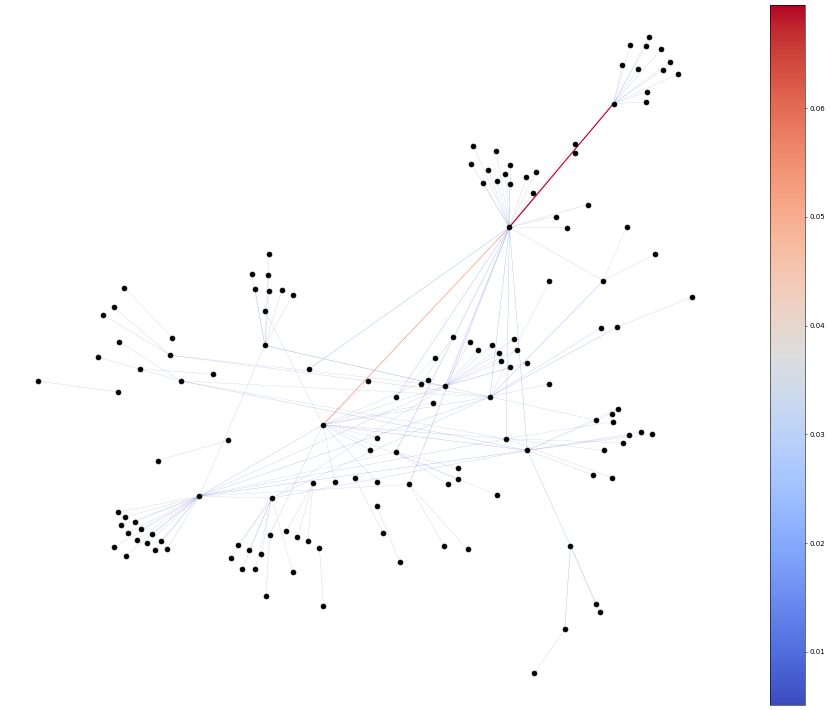

In [13]:
pos2 = generate_edge_betw_plot('inf-USAir97.mtx', colormap=True, with_edge_labels= False, edge_threshold=0.005, fig_width=16, fig_height=14, pos=pos2)

PearsonRResult(statistic=0.37156755905871686, pvalue=1.3877395177269163e-70)


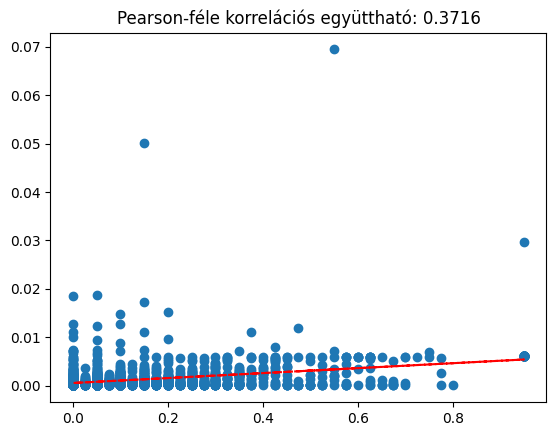

SignificanceResult(statistic=0.21672128448190153, pvalue=5.133942451771389e-24)


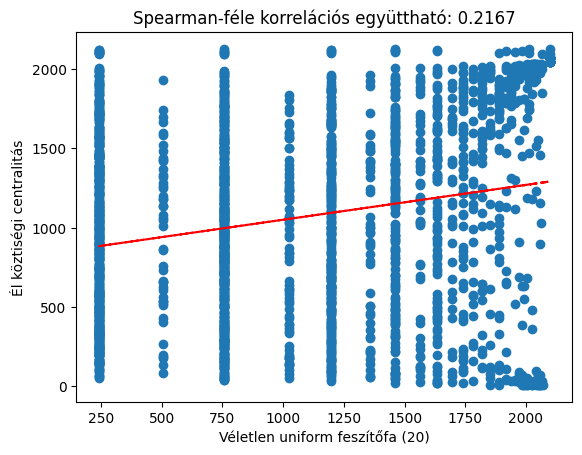

In [54]:
corr('inf-USAir97.mtx', 20)

PearsonRResult(statistic=0.30465414945156394, pvalue=9.884680447341404e-46)


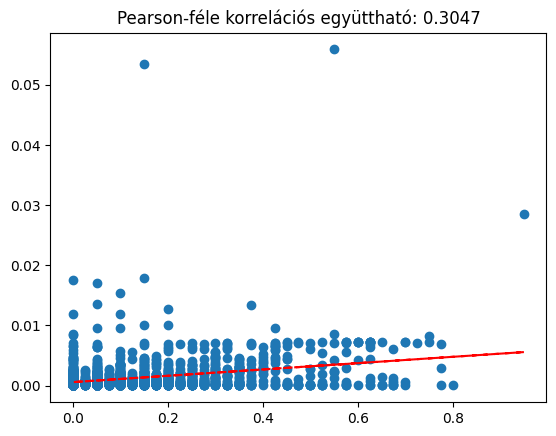

SignificanceResult(statistic=0.17533273272182642, pvalue=9.236785607563456e-16)


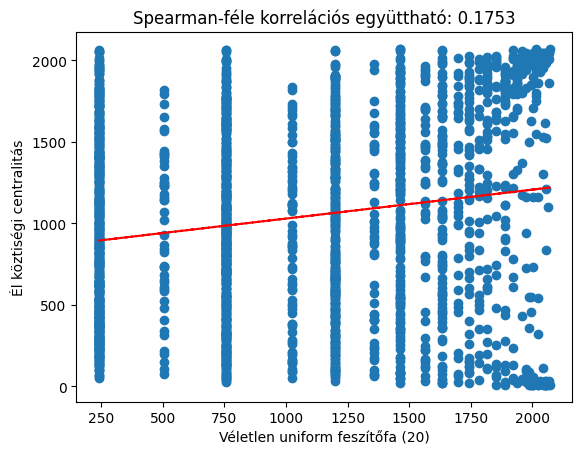

In [55]:
corr('inf-USAir97.mtx', 20, remove_node_with_one_edge=True)

PearsonRResult(statistic=0.3927827320966549, pvalue=2.2836941856194247e-79)


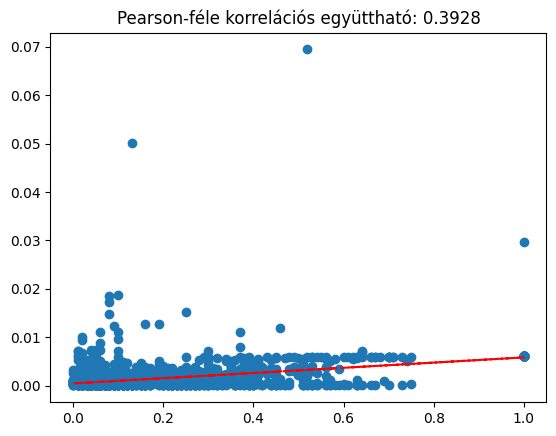

SignificanceResult(statistic=0.2341621620360767, pvalue=7.177123526337933e-28)


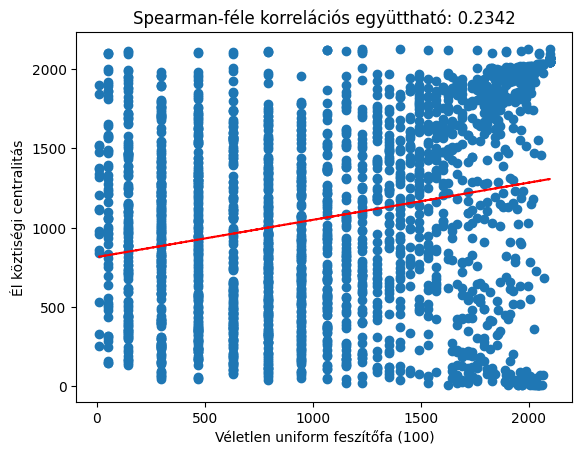

In [103]:
corr('inf-USAir97.mtx', 100)

PearsonRResult(statistic=0.3406037130022511, pvalue=2.039427599585496e-57)


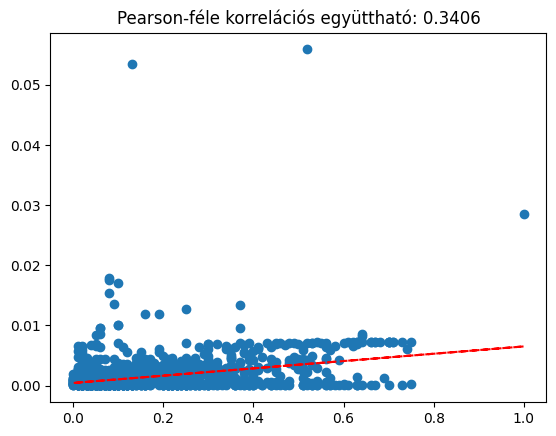

SignificanceResult(statistic=0.20038864881116117, pvalue=3.342087791148944e-20)


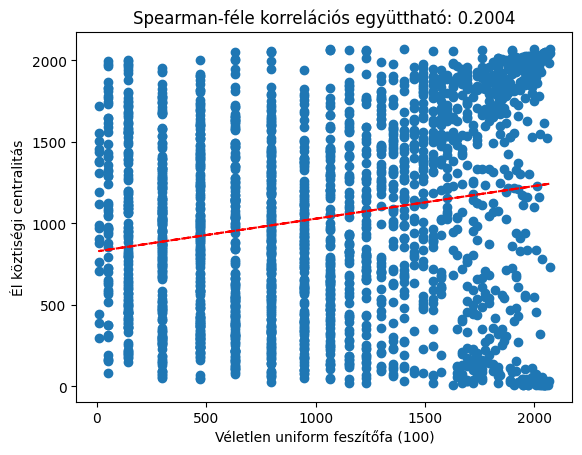

In [104]:
corr('inf-USAir97.mtx', 100, remove_node_with_one_edge=True)

### FB-PAGES-FOOD

- **social network**
- csúcsok száma: **620**
- élek száma: **2102**
- desc: Data collected about Facebook pages (November 2017). These datasets represent blue verified Facebook page networks of different categories. Nodes represent the pages and edges are mutual likes among them.
- irányítatlan gráf, hurokélekkel
- forrás: https://networkrepository.com/fb-pages-food.php

In [13]:
G = func.network_graph("fb-pages-food.edges", ",")

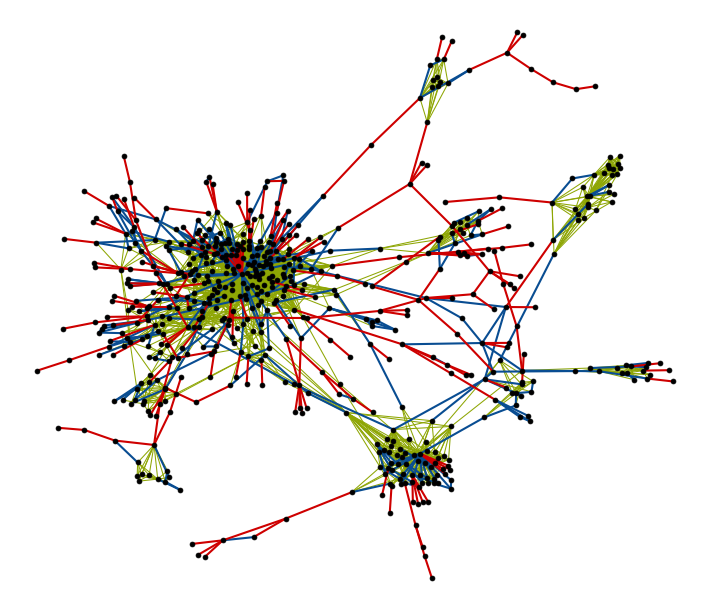

In [15]:
#G.remove_edges_from(nx.selfloop_edges(G))
#matrix = func.ust_matrix(G, 50)
matrix = pickle.load(open("pickle/fb-pages-food_ust_50.ls","rb"))
normalized = func.ust_normalized(matrix)
pos3 = func.draw_normalized(normalized, with_node_labels = False, with_edge_labels=False, fig_height = 12, fig_width=14)

#### Edge betweenness : FB-PAGES-FOOD

Hálózat beolvasása:

Betweenness centrality számolása

Élek színezése edge betweenness segítségével:


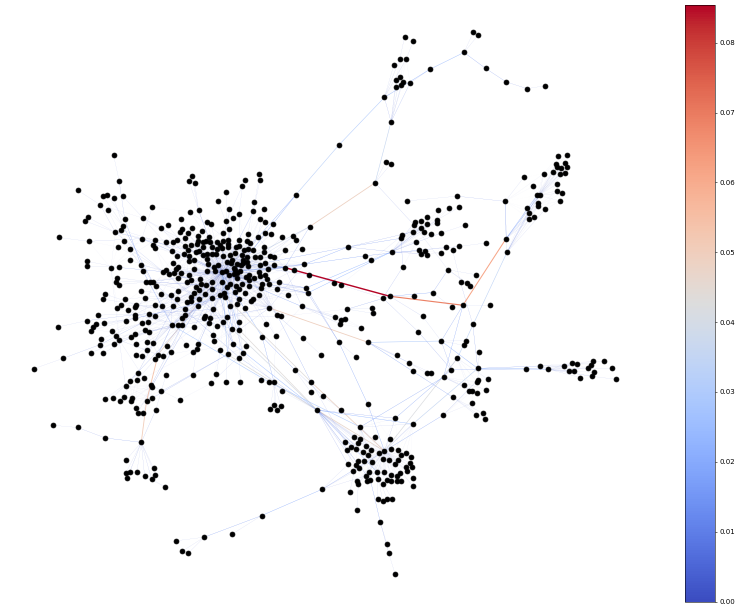

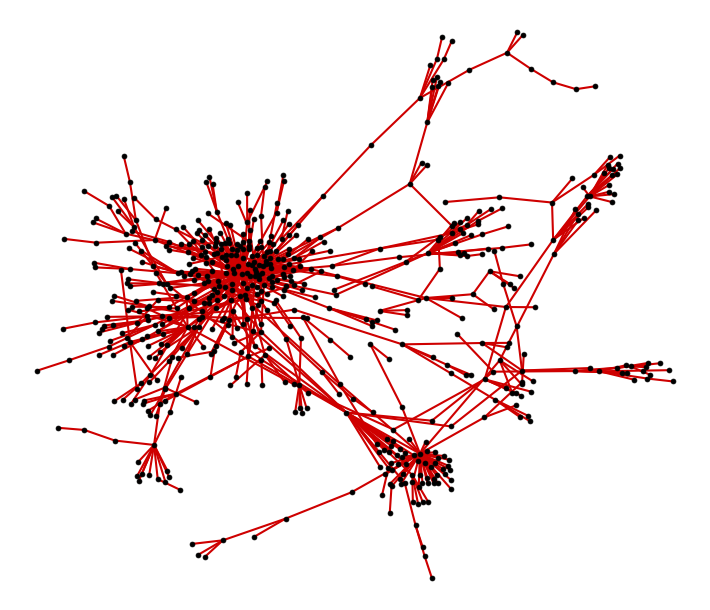

In [17]:
pos3 = generate_edge_betw_plot('fb-pages-food.edges', colormap=True, with_edge_labels= False, fig_height = 12, fig_width=14, pos=pos3, with_mst=True)

PearsonRResult(statistic=-0.007115152682971221, pvalue=0.7450543980486063)


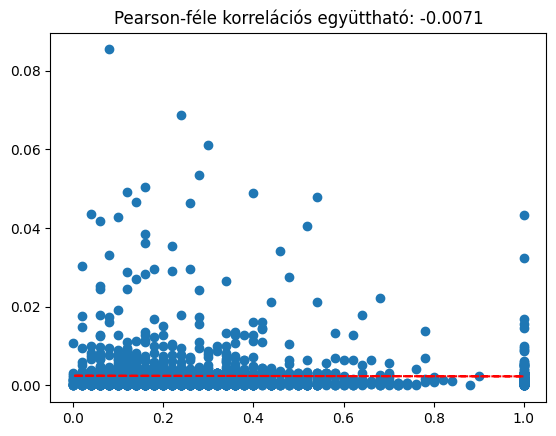

SignificanceResult(statistic=-0.0019759362684840308, pvalue=0.928048348858093)


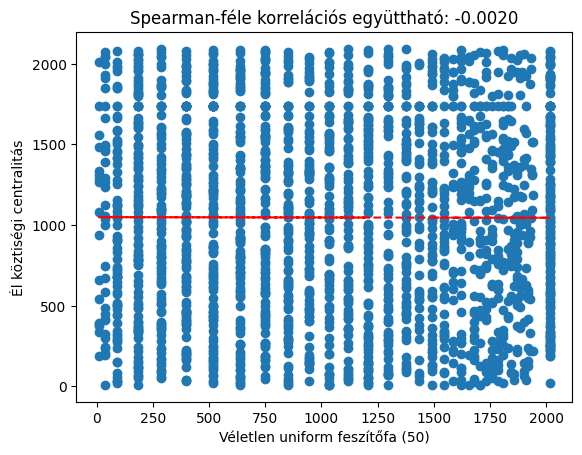

In [56]:
corr("fb-pages-food.edges", 50, split=",")

PearsonRResult(statistic=-0.022970801837461242, pvalue=0.30818441586924133)


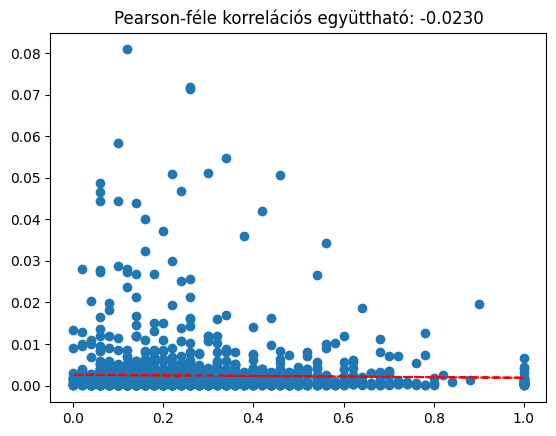

SignificanceResult(statistic=-0.002111995258040317, pvalue=0.9253626866214012)


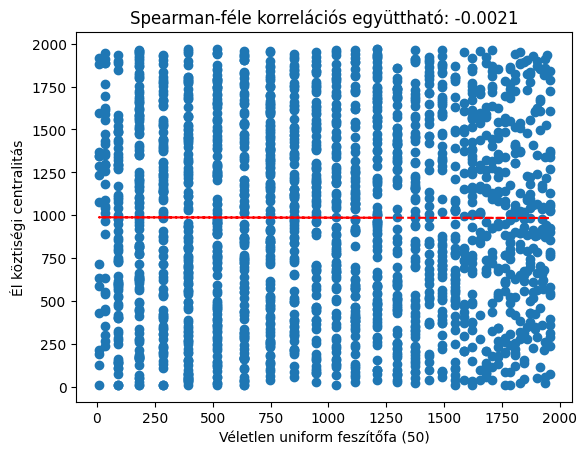

In [57]:
corr("fb-pages-food.edges", 50, split=",", remove_node_with_one_edge=True)